In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Diabetes               253680 non-null  int64
 1   HighBP                 253680 non-null  int64
 2   HighChol               253680 non-null  int64
 3   BMI                    253680 non-null  int64
 4   Smoker                 253680 non-null  int64
 5   Stroke                 253680 non-null  int64
 6   Myocardial             253680 non-null  int64
 7   PhysActivity           253680 non-null  int64
 8   Fruit                  253680 non-null  int64
 9   Vegetables             253680 non-null  int64
 10  HeavyDrinker           253680 non-null  int64
 11  HasHealthcare          253680 non-null  int64
 12  NotAbleToAffordDoctor  253680 non-null  int64
 13  GeneralHealth          253680 non-null  int64
 14  MentalHealth           253680 non-null  int64
 15  PhysicalHealth   

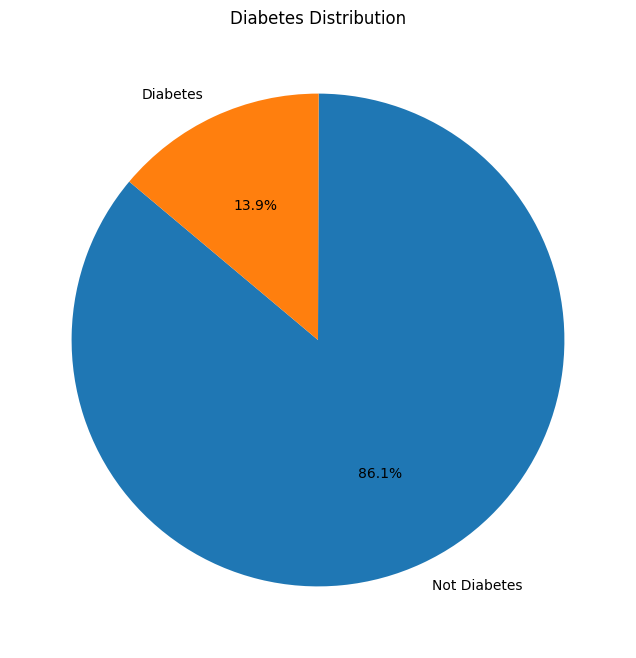

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8


In [2]:
diabetes_count = df['Diabetes'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(diabetes_count, labels = ['Not Diabetes','Diabetes'], autopct = '%1.1f%%', startangle=140)
plt.title('Diabetes Distribution')
plt.show()
df.head()

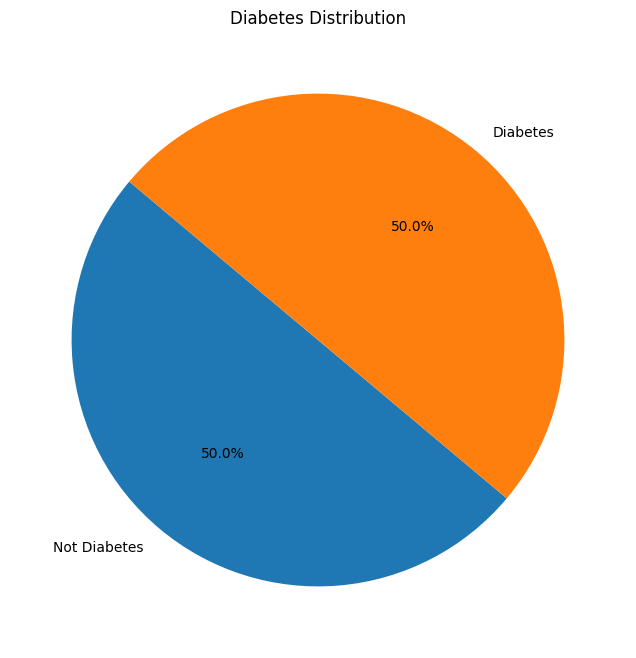

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8


In [3]:
from sklearn.utils import resample

majority = df[df.Diabetes == 0]
minority = df[df.Diabetes == 1]

majority_undersampled = resample(majority, replace = False, n_samples = len(minority),random_state = 13)
balanced_data = pd.concat([majority_undersampled, minority])

diabetes_count = balanced_data['Diabetes'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(diabetes_count, labels = ['Not Diabetes','Diabetes'], autopct = '%1.1f%%', startangle=140)
plt.title('Diabetes Distribution')
plt.show()
df.head()


# Question 1

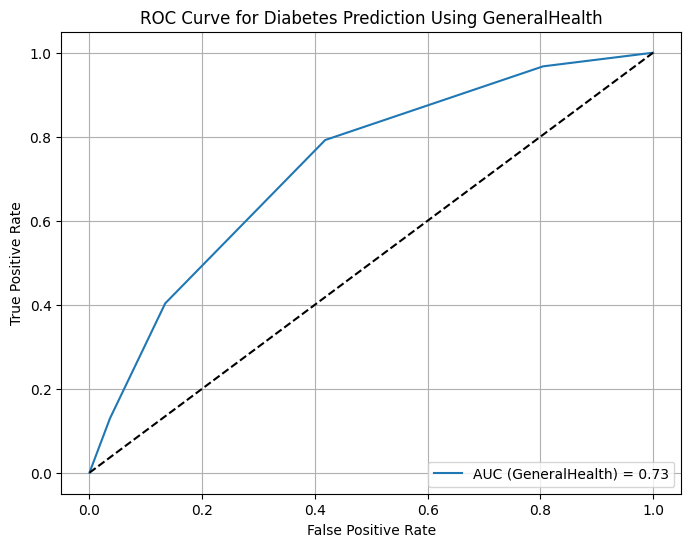

('GeneralHealth', 0.7302410451975254)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

X = balanced_data.drop('Diabetes', axis = 1)
y = balanced_data['Diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

auc_scores = {}
for feature in X_train.columns:
    X_train_f = X_train[[feature]]
    X_test_f = X_test[[feature]]
    
    lr = LogisticRegression(random_state = 13)
    lr.fit(X_train_f, y_train)
    
    y_pred = lr.predict_proba(X_test_f)[:,1]
    auc_score_feature = roc_auc_score(y_test, y_pred)
    
    auc_scores[feature] = auc_score_feature
    
best_predictor = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_predictor]
    
X_train_best = X_train[[best_predictor]]
X_test_best = X_test[[best_predictor]]
lr_best = LogisticRegression(random_state = 13)
lr_best.fit(X_train_best, y_train)

y_pred_best = lr_best.predict_proba(X_test_best)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC (GeneralHealth) = {best_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--') 
plt.title('ROC Curve for Diabetes Prediction Using GeneralHealth')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

best_predictor, best_auc


# Question 2

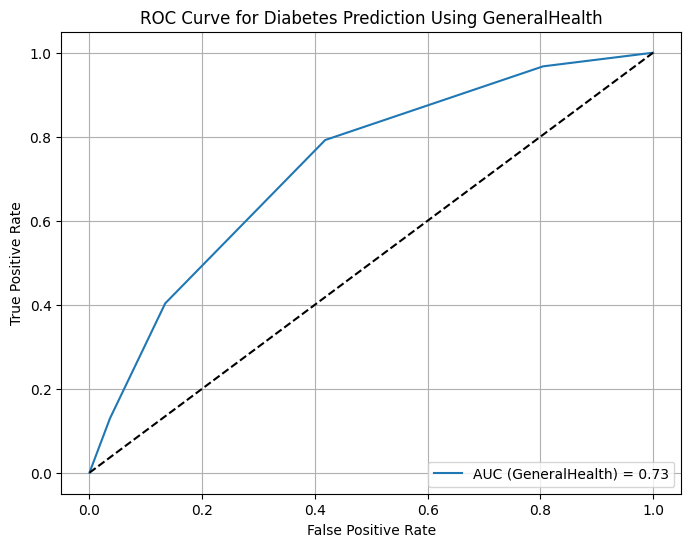

('GeneralHealth', 0.7302410451975254)

In [5]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, roc_curve

X = balanced_data.drop('Diabetes', axis = 1)
y = balanced_data['Diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# Dictionary to store AUC scores for each feature
auc_scores_q2 = {}

for feature in X_train.columns:
    X_train_f = X_train[[feature]]
    X_test_f = X_test[[feature]]
    
    # Train LinearSVC with CalibratedClassifierCV to get probability estimates
    svm_q2 = LinearSVC(random_state=13, dual=False)
    calibrated_svm_q2 = CalibratedClassifierCV(svm_q2)
    calibrated_svm_q2.fit(X_train_f, y_train)
    
    # Predict probabilities for the test set
    y_pred_q2 = calibrated_svm_q2.predict_proba(X_test_f)[:, 1]
    auc_score_feature = roc_auc_score(y_test, y_pred_q2)
    
    auc_scores_q2[feature] = auc_score_feature

best_predictor_q2 = max(auc_scores_q2, key=auc_scores_q2.get)
best_auc_q2 = auc_scores_q2[best_predictor_q2]

# Training the model on the best predictor
X_train_best_q2 = X_train[[best_predictor_q2]]
X_test_best_q2 = X_test[[best_predictor_q2]]
svm_best_q2 = LinearSVC(random_state=13, dual=False)
calibrated_svm_best_q2 = CalibratedClassifierCV(svm_best_q2)
calibrated_svm_best_q2.fit(X_train_best_q2, y_train)

y_pred_best_q2 = calibrated_svm_best_q2.predict_proba(X_test_best_q2)[:, 1]

fpr_q2, tpr_q2, thresholds_q2 = roc_curve(y_test, y_pred_best_q2)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_q2, tpr_q2, label=f'AUC ({best_predictor_q2}) = {best_auc_q2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'ROC Curve for Diabetes Prediction Using {best_predictor_q2}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

best_predictor_q2, best_auc_q2



# Question 3

GeneralHealth 0.7302410451975254


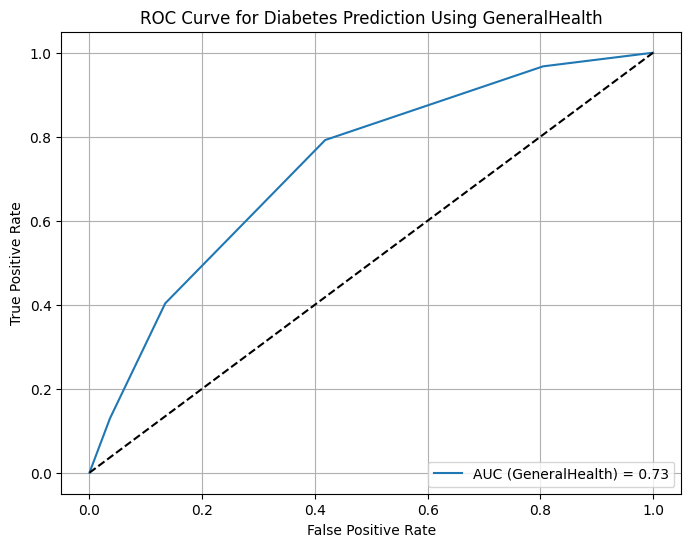

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

auc_scores_dt = {}
for feature in X_train.columns:
    X_train_f = X_train[[feature]]
    X_test_f = X_test[[feature]]
    
    dt = DecisionTreeClassifier(random_state = 13)
    dt.fit(X_train_f, y_train)
    
    y_pred_dt = dt.predict_proba(X_test_f)[:, 1]
    auc_score_dt = roc_auc_score(y_test, y_pred_dt)
    
    auc_scores_dt[feature] = auc_score_dt

best_predictor_dt = max(auc_scores_dt, key=auc_scores_dt.get)
best_auc_dt = auc_scores_dt[best_predictor_dt]

print(best_predictor_dt, best_auc_dt)

# Re-train the decision tree model using the best predictor
X_train_dt_best = X_train[[best_predictor_dt]]
X_test_dt_best = X_test[[best_predictor_dt]]
dt_best = DecisionTreeClassifier(random_state=13)
dt_best.fit(X_train_dt_best, y_train)

# Predict the probabilities on the test set using the best predictor
y_pred_dt_best = dt_best.predict_proba(X_test_dt_best)[:, 1]

# Calculate the ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt_best)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC ({best_predictor_dt}) = {best_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.title(f'ROC Curve for Diabetes Prediction Using {best_predictor_dt}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



# Question 4

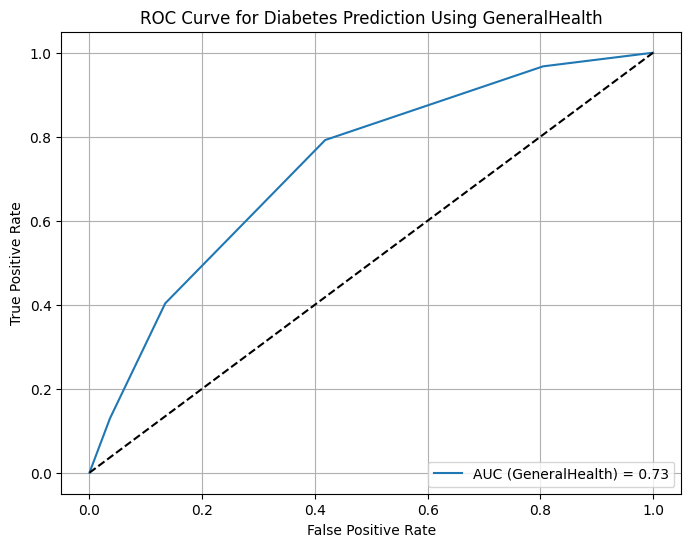

('GeneralHealth', 0.7302410451975254)

In [9]:
from sklearn.ensemble import RandomForestClassifier

auc_scores_rf = {}

for feature in X_train.columns:

    X_train_f = X_train[[feature]]
    X_test_f = X_test[[feature]]
    
    rf = RandomForestClassifier(random_state=13)
    rf.fit(X_train_f, y_train)

    y_pred_rf = rf.predict_proba(X_test_f)[:, 1]
    auc_score_rf = roc_auc_score(y_test, y_pred_rf)
    
    # Store the AUC score
    auc_scores_rf[feature] = auc_score_rf

# Find the feature with the highest AUC score
best_predictor_rf = max(auc_scores_rf, key=auc_scores_rf.get)
best_auc_rf = auc_scores_rf[best_predictor_rf]

X_train_rf_best = X_train[[best_predictor_rf]]
X_test_rf_best = X_test[[best_predictor_rf]]
rf_best = RandomForestClassifier(random_state=13)
rf_best.fit(X_train_rf_best, y_train)

# Predict the probabilities on the test set using the best predictor
y_pred_rf_best = rf_best.predict_proba(X_test_rf_best)[:, 1]

# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_best)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC ({best_predictor_rf}) = {best_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.title(f'ROC Curve for Diabetes Prediction Using {best_predictor_rf}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

best_predictor_rf, best_auc_rf


# Question 5

/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent thi

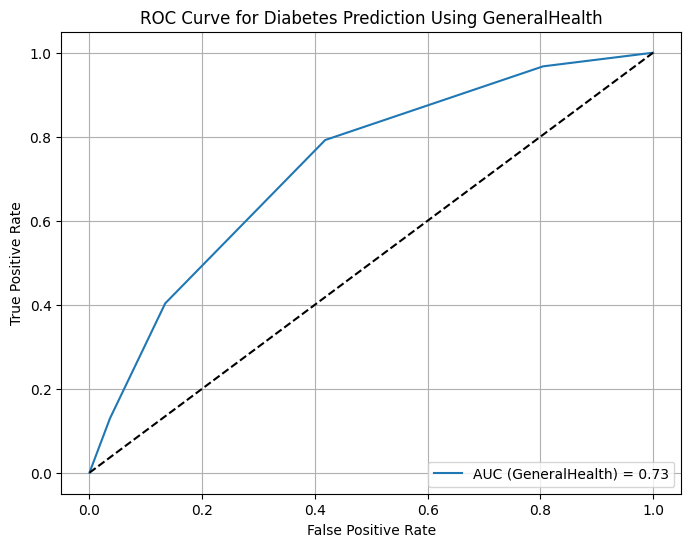

('GeneralHealth', 0.7302410451975254)

In [10]:
from sklearn.ensemble import AdaBoostClassifier

# Dictionary to store AUC scores for each feature using AdaBoost
auc_scores_ab = {}

for feature in X_train.columns:
    # Prepare the training and test sets for the current feature
    X_train_f = X_train[[feature]]
    X_test_f = X_test[[feature]]
    
    # Initialize and train the AdaBoost model
    ab = AdaBoostClassifier(random_state=13)
    ab.fit(X_train_f, y_train)
    
    # Predict probabilities for the test set
    y_pred_ab = ab.predict_proba(X_test_f)[:, 1]
    auc_score_ab = roc_auc_score(y_test, y_pred_ab)
    
    # Store the AUC score
    auc_scores_ab[feature] = auc_score_ab

# Find the feature with the highest AUC score
best_predictor_ab = max(auc_scores_ab, key=auc_scores_ab.get)
best_auc_ab = auc_scores_ab[best_predictor_ab]

X_train_ab_best = X_train[[best_predictor_ab]]
X_test_ab_best = X_test[[best_predictor_ab]]
ab_best = AdaBoostClassifier(random_state=13)
ab_best.fit(X_train_ab_best, y_train)

# Predict the probabilities on the test set
y_pred_ab_best = ab_best.predict_proba(X_test_ab_best)[:, 1]

# Compute ROC curve
fpr_ab, tpr_ab, _ = roc_curve(y_test, y_pred_ab_best)
auc_ab = roc_auc_score(y_test, y_pred_ab_best)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ab, tpr_ab, label=f'AUC ({best_predictor_ab}) = {auc_ab:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.title(f'ROC Curve for Diabetes Prediction Using {best_predictor_ab}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

best_predictor_ab, best_auc_ab


# Question a

/Users/alex_z/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best model: AdaBoost with AUC 0.8237331930494654


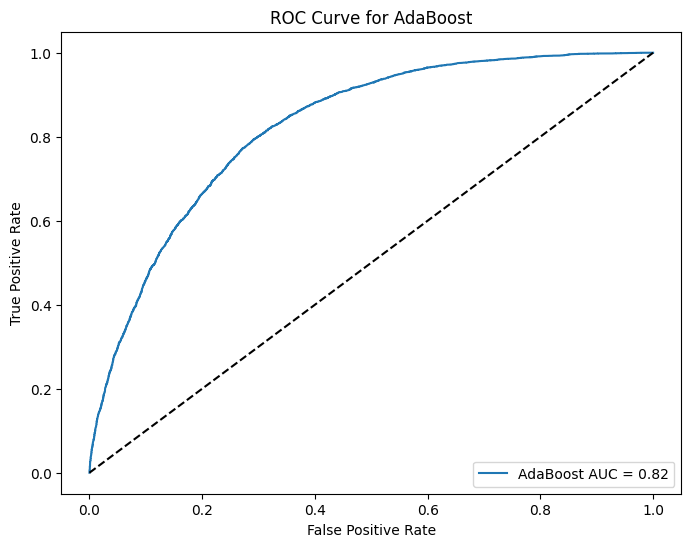

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load your data into X and y
X = balanced_data.drop('Diabetes', axis=1)
y = balanced_data['Diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Initialize models including a calibrated LinearSVC
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=13),
    'Linear SVM': CalibratedClassifierCV(LinearSVC(dual=False, random_state=13)),
    'Decision Tree': DecisionTreeClassifier(random_state=13),
    'Random Forest': RandomForestClassifier(random_state=13),
    'AdaBoost': AdaBoostClassifier(random_state=13)
}

# Dictionary to store AUC scores
auc_scores = {}

# Train each model and compute AUC scores
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_prob)
    auc_scores[name] = auc_score

# Find the best model
best_model_name = max(auc_scores, key=auc_scores.get)
best_model = models[best_model_name]
print(f"Best model: {best_model_name} with AUC {auc_scores[best_model_name]}")

# Plot ROC curve for the best model
y_pred_best_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_best_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} AUC = {auc_scores[best_model_name]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'ROC Curve for {best_model_name}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [16]:
auc_scores

{'Logistic Regression': 0.8211134158254769,
 'Linear SVM': 0.8206390573180196,
 'Decision Tree': 0.6516712302945922,
 'Random Forest': 0.8147314269614763,
 'AdaBoost': 0.8237331930494654}

# Question b

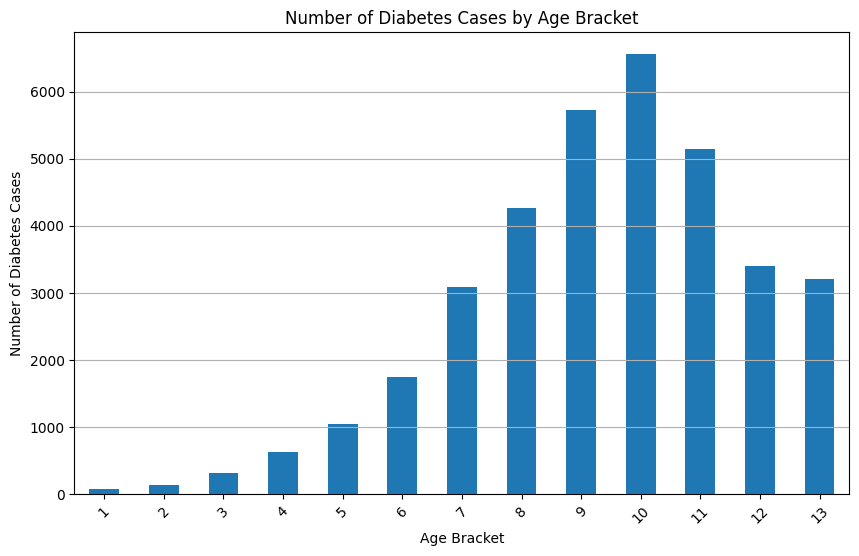

In [17]:
import matplotlib.pyplot as plt

zodiac_diabetes_counts = balanced_data.groupby('AgeBracket')['Diabetes'].sum()

# Plot a histogram of diabetes cases by Zodiac sign
plt.figure(figsize=(10, 6))
zodiac_diabetes_counts.plot(kind='bar')
plt.title('Number of Diabetes Cases by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Number of Diabetes Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


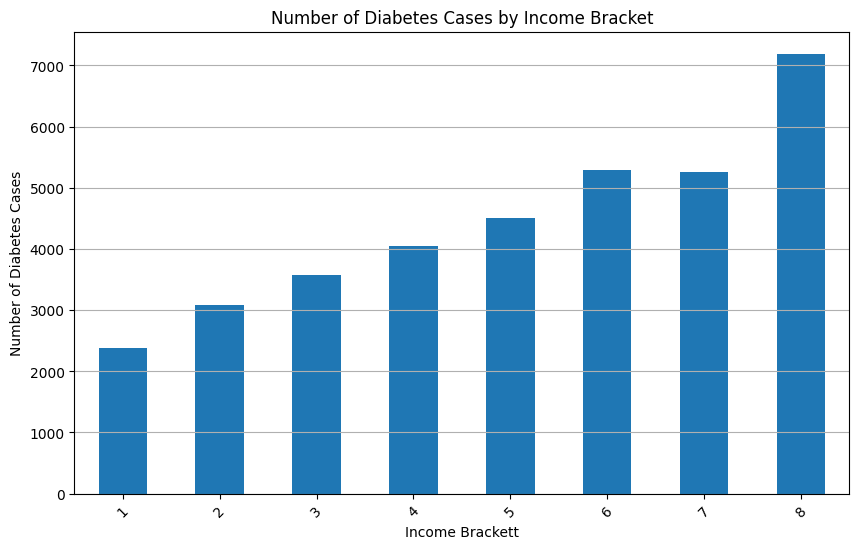

In [20]:
import matplotlib.pyplot as plt

zodiac_diabetes_counts = balanced_data.groupby('IncomeBracket')['Diabetes'].sum()

# Plot a histogram of diabetes cases by Zodiac sign
plt.figure(figsize=(10, 6))
zodiac_diabetes_counts.plot(kind='bar')
plt.title('Number of Diabetes Cases by Income Bracket')
plt.xlabel('Income Brackett')
plt.ylabel('Number of Diabetes Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
